In [ ]:
! wget https://gitlab.com/mobilegenomesgroup/hic_time_series/-/raw/master/dataset/hic_time_series_dataset_100.npz
! wget https://gitlab.com/mobilegenomesgroup/hic_time_series/-/raw/master/models/hic_time_series_model_100.h5

In [ ]:
%matplotlib inline
from keras.models import Sequential, load_model
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, LSTM, Dense, Flatten
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from numpy import asarray, vstack
from numpy import linspace, empty, reshape, savez_compressed, load
from numpy.random import randint
import os
import collections
import keras

In [ ]:
def get_model(side_length=100):
    model = Sequential()
    model.add(TimeDistributed(Conv2D(2, (2,2), activation='relu'),input_shape=(None,side_length,side_length,1)))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50))
    model.add(Dense(24, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
def plot_karyotype_sequence(karyotype_sequence):
    for i in range(karyotype_sequence.shape[0]):
        for j in range(karyotype_sequence.shape[1]):
            plt.subplot( karyotype_sequence.shape[0] ,karyotype_sequence.shape[1], (j + 1 ) + ( karyotype_sequence.shape[1]  * i ) )
            plt.axis('off')
            time_point_array = karyotype_sequence[i,j,:,:,:]
            plt.imshow(np.reshape(time_point_array,(time_point_array.shape[0],time_point_array.shape[1])),cmap="gray")
    plt.show()

In [ ]:
side_length=100
dataset = load('hic_time_series_dataset_100.npz')

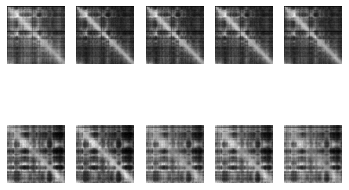

In [ ]:
plot_karyotype_sequence(dataset['images'][0:2])

In [ ]:
dataset['labels'][0:2].astype('int32')

array([[0],
       [1]], dtype=int32)

In [ ]:

model = get_model(side_length)
#model.fit(dataset['images'], dataset['labels'], batch_size=50, epochs=300)
#model.save('hic_time_series_model_100.h5')

Epoch 1/300
24/24 [==============================] - 0s 12ms/step - loss: 2.6691 - accuracy: 0.6817
Epoch 2/300
24/24 [==============================] - 0s 11ms/step - loss: 2.2347 - accuracy: 0.9558
Epoch 3/300
24/24 [==============================] - 0s 10ms/step - loss: 1.9203 - accuracy: 0.9950
Epoch 4/300
24/24 [==============================] - 0s 10ms/step - loss: 1.5835 - accuracy: 1.0000
Epoch 5/300
24/24 [==============================] - 0s 10ms/step - loss: 1.2596 - accuracy: 1.0000
Epoch 6/300
24/24 [==============================] - 0s 10ms/step - loss: 0.9959 - accuracy: 1.0000
Epoch 7/300
24/24 [==============================] - 0s 10ms/step - loss: 0.7980 - accuracy: 1.0000
Epoch 8/300
24/24 [==============================] - 0s 10ms/step - loss: 0.6491 - accuracy: 1.0000
Epoch 9/300
24/24 [==============================] - 0s 10ms/step - loss: 0.5379 - accuracy: 1.0000
Epoch 10/300
24/24 [==============================] - 0s 11ms/step - loss: 0.4536 - accuracy: 1.0000

In [ ]:
model=load_model('hic_time_series_model_100.h5')

In [ ]:
predictions=model.predict_classes(dataset['images'])

In [ ]:
print(predictions[0:24])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
print(predictions[24:48])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
